<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_NormalEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Laboratorio 5: Regresión Multivariada con Ecuación Normal  

## Dayana Andrea Henao Arbeláez

# Normal equation
Se puede encontrar una solucion exacta para theta sin necesidad de emplear el gradiente descente de la sesiones pasadas, para ellos se puede encontrar el valor minimo de theta y a partir de alli determinar el valor de theta que minimiza J.

Los pasos para esta minimizacion se dejan como tarea, y pueden ser calculados según lo siguiente:

Si J es la funcion de coste dada por:

\begin{equation}
J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2
\end{equation}


Demostrar que:

- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T$

- $J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


- $ \nabla _{\theta} J = \frac{1}{m} (2 X(X^T \Theta) -2XY)$


Para encontrar el valor minimo de $\theta$,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$



En este caso,tenemos que:

sea $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

sea $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

sea $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$




Para la demostracion anterior emplee las siguientes propiedades:

- $z^T z= \sum_i z_i^2$
- $a^T b = b^Ta$
- $\nabla _x b^T x = b$
- $\nabla _x  x^T A x = 2Ax$

donde a, b, x son matrices, $\nabla_x$ es la derivada respecto al vector x, y A es una matriz simétrica




### Demostración

Se define la función de coste
$$J = (\Theta ^T X - Y^T)(\Theta ^T X - Y^T)^T$$

Se expande el producto matricial $(A - B)(A - B)^T = AA^T - AB^T - BA^T + BB^T$

$$J = (\Theta ^T X)(\Theta ^T X)^T - (\Theta ^T X)Y - Y^T(\Theta ^T X)^T + Y^T Y$$

Los dos términos cruzados son escalares y transpuestos entre sí, por lo tanto pueden escribirse como $-2(Θ^T X)Y$

$$J = (\Theta ^T X)(\Theta ^T X)^T - 2(\Theta ^T X)Y + Y^T Y$$

Se reescribe el primer término agrupando $X X^T$

$$J = \Theta ^T X X^T \Theta - 2\,\Theta ^T X Y + Y^T Y$$

Derivada respecto a $Θ$

$$\frac{d J}{d\Theta} = X(\Theta^T X)^T + (\Theta ^T X) X^T-2XY$$

$$\frac{d J}{d\Theta} = 2 X(\Theta^T X)^T -2XY$$

$$\frac{dJ}{d\Theta} = 2 X X^T \Theta - 2 X Y$$

Para encontrar el punto mínimo se iguala la derivada a Cero

$$2 X X^T \Theta - 2 X Y = 0$$

Se simplifica la expresión

$$X X^T \Theta = X Y$$

Se multiplica a ambos lados por $(X X^T)^{-1}$

$$(X X^T)^{-1} X X^T \Theta = (X X^T)^{-1} X Y$$

Así, el vector de parámetros óptimos es:

$$\Theta = (X X^T)^{-1} X Y$$




In [244]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

1. Para los datos del laboratorio anterior aplicar la ecuacion normal.

In [245]:
# Datos del laboratorio anterior 

# Número de muestras (puntos de datos)
N = 100

# Generación de las dos variables independientes x₁ y x₂ en el rango [-1, 1]
x_1=2*np.random.random(N)-1
x_2=2*np.random.random(N)-1

# Cálculo de la variable dependiente (etiqueta)
y_label=2.1*x_1-3.1*x_2

df=pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})

df

,x1,x2,y
0,-0.803044,-0.973693,1.332057
1,-0.013687,-0.616534,1.882511
2,-0.853124,-0.234849,-1.063528
3,-0.049877,-0.605069,1.770973
4,-0.826670,0.363002,-2.861314
...,...,...,...
95,0.234283,-0.898550,3.277499
96,0.284982,-0.570253,2.366248
97,-0.235587,0.128292,-0.892437
98,0.901393,-0.865840,4.577030


In [ ]:
def theta(X, Y):
    """
    Calcula los parámetros óptimos del modelo de regresión lineal utilizando la ecuación normal.

    Parámetros:
    -----------
    X : ndarray (shape = (n+1, m))
        Matriz de características, donde cada columna representa una muestra.
    Y : ndarray (shape = (1, m))
        Valores reales de salida (etiquetas verdaderas).

    Retorna:
    --------
    theta_opt : ndarray (shape = (n+1, 1))
        Vector de parámetros óptimos del modelo.
    """
    # Cálculo de θ utilizando la ecuación normal: θ = ((X·Xᵀ)⁻¹·X·Yᵀ)ᵀ
    theta_opt = (np.linalg.inv(X @ X.T) @ X @ Y.T).T
    return theta_opt

In [247]:
# Número de datos de entrenamiento 

m=N
# Características (2: x_1, x_2)
n=2

X=np.zeros((n+1,m))
X[0,:]=1 
X[1,:]=df['x1']
X[2,:]=df['x2']

print(np.shape(X))
X

Y = df['y'].values.reshape(1, -1)

(3, 100)


In [248]:
theta(X, Y)

array([[ 1.38777878e-17,  2.10000000e+00, -3.10000000e+00]])

Al aplicar la ecuación normal se obtuvieron los mismos resultados que mediante el método del gradiente descendente. Estos resultados confirman que los valores de los parámetros $\theta_0 = 0$, $\theta_1 = 2.1$ y $\theta_2 = -3.1$ son los que mejor se ajustan al conjunto de datos.


2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

In [249]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_33844/721930226.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [250]:
df

,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


In [251]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

df=pd.DataFrame(data)

df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_33844/2115401742.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population
 
 MEDV     Median value of owner-occupied homes in $1000's

In [252]:
variables=[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]

In [253]:
df.columns=variables
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [254]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [255]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


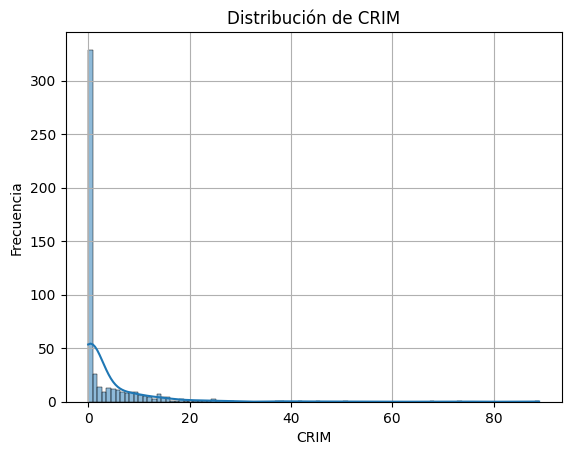

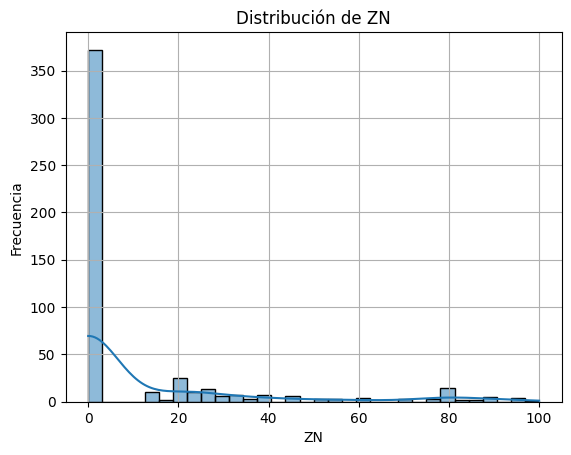

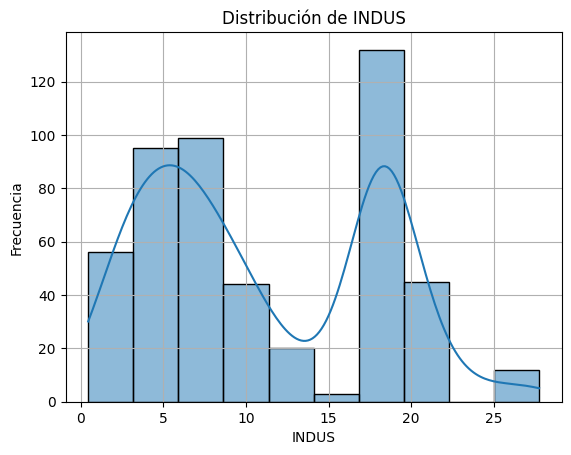

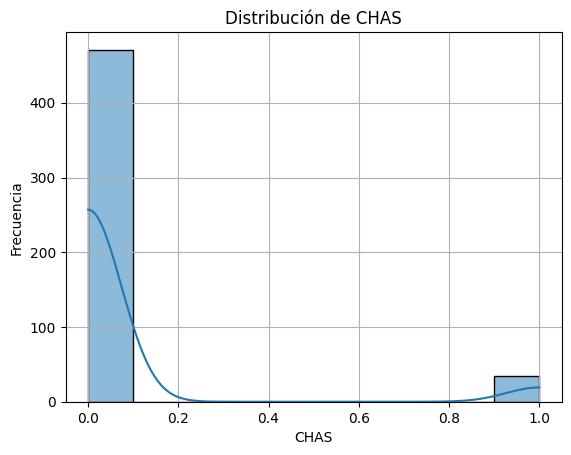

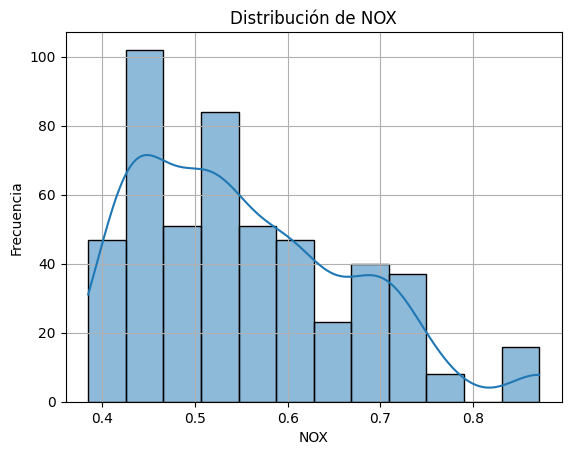

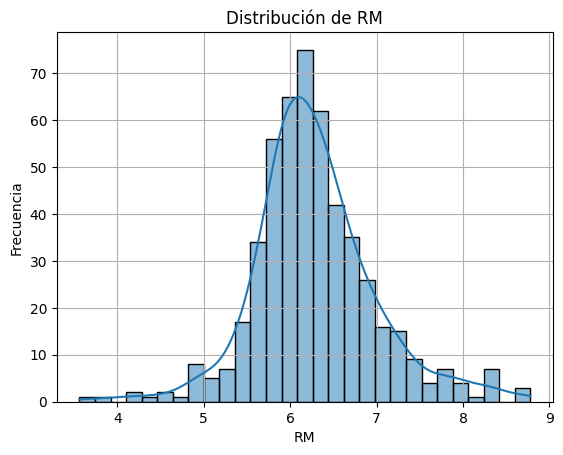

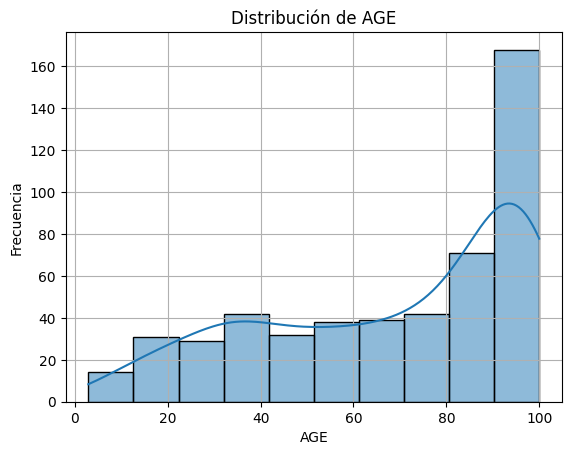

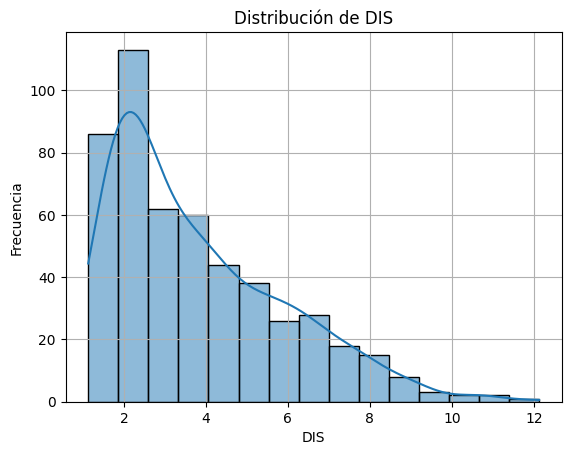

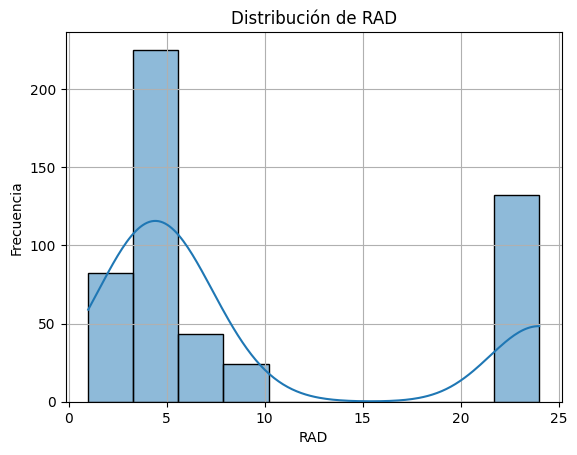

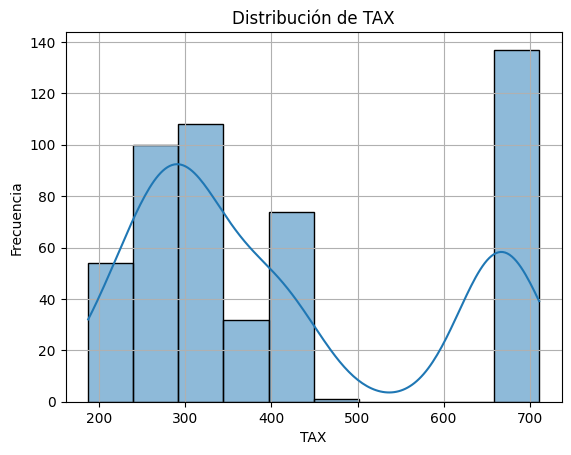

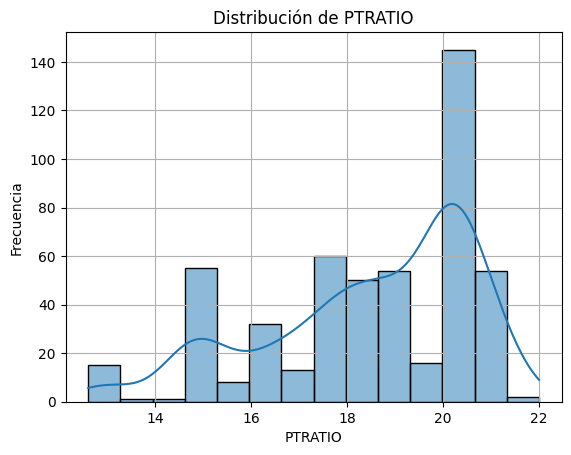

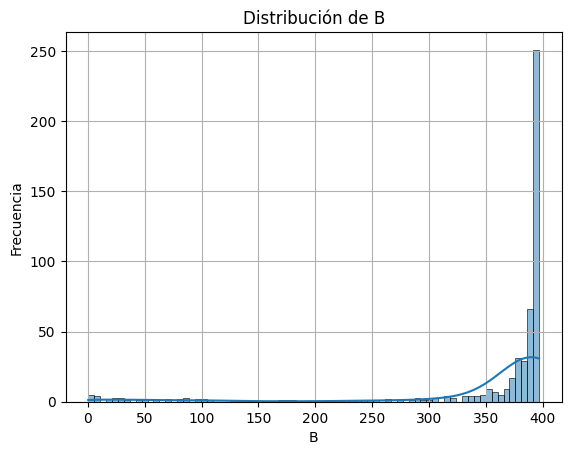

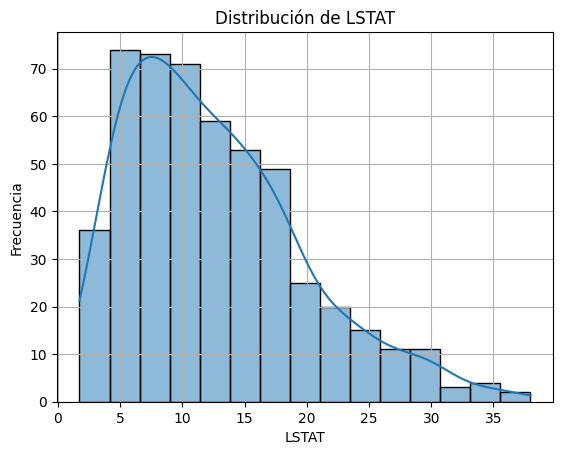

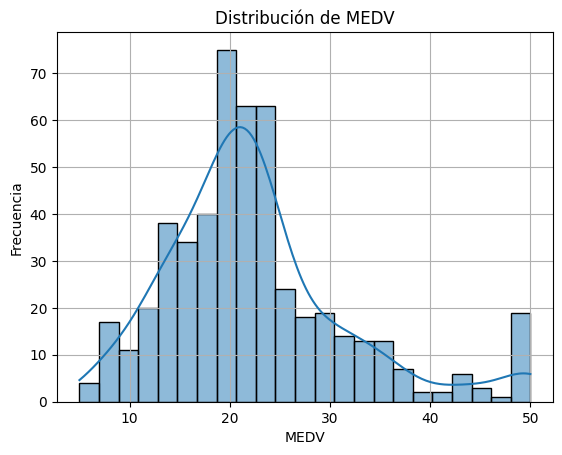

In [256]:
for i in df.columns:
    plt.figure()
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribución de {i}')
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()

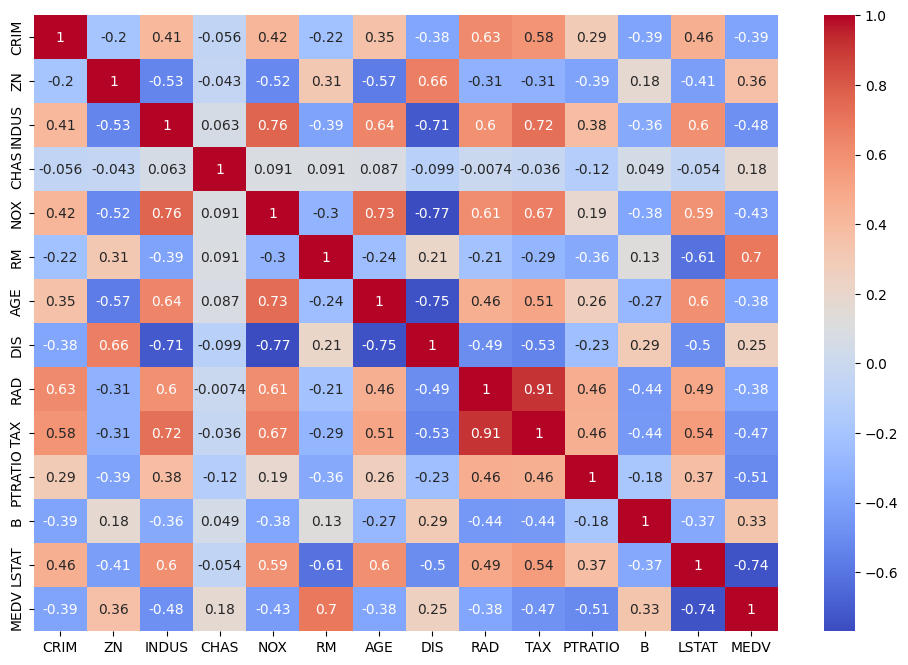

In [257]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

### Regresión con todas las variables 

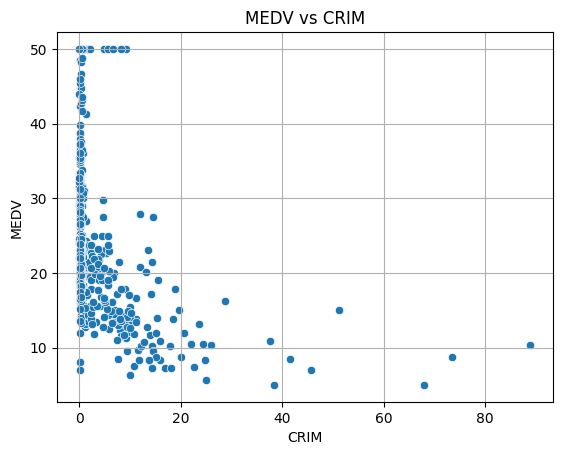

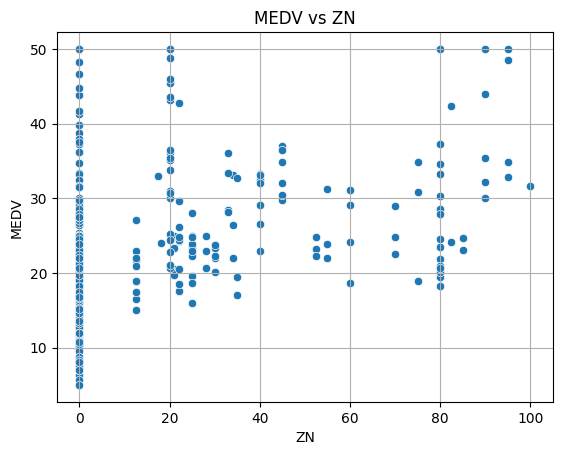

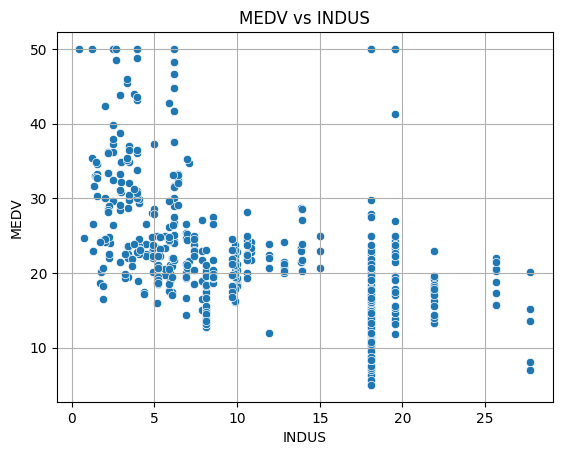

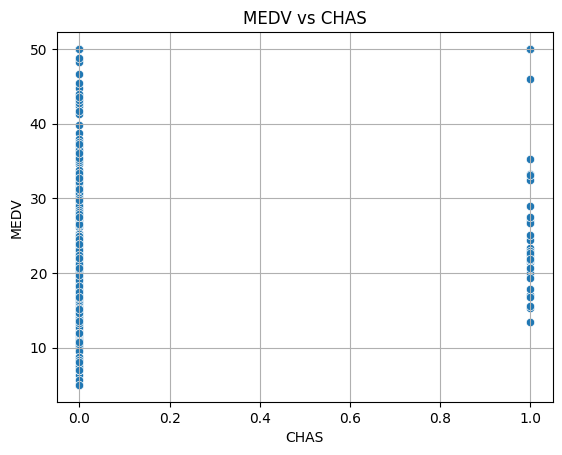

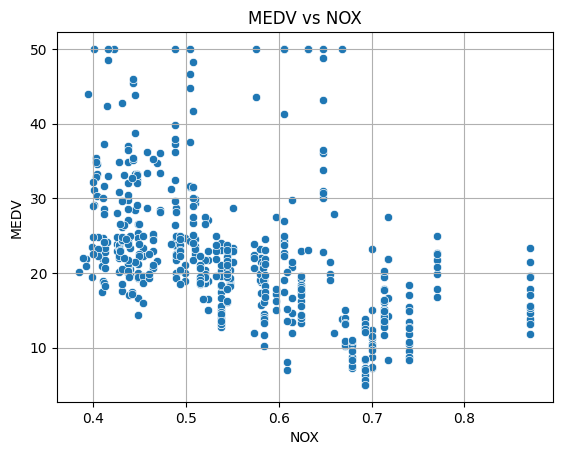

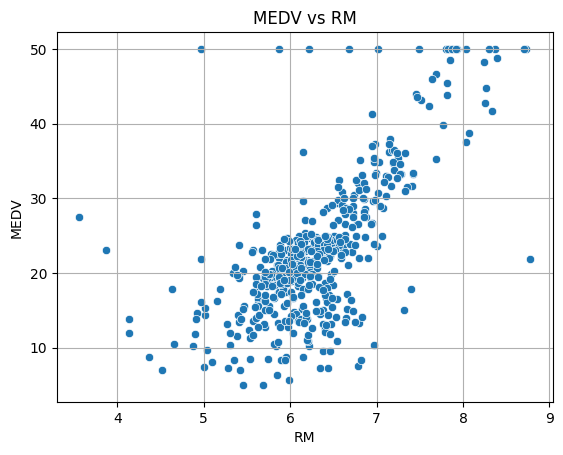

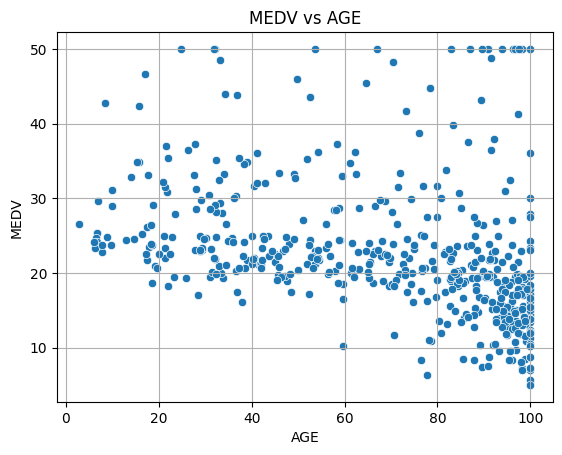

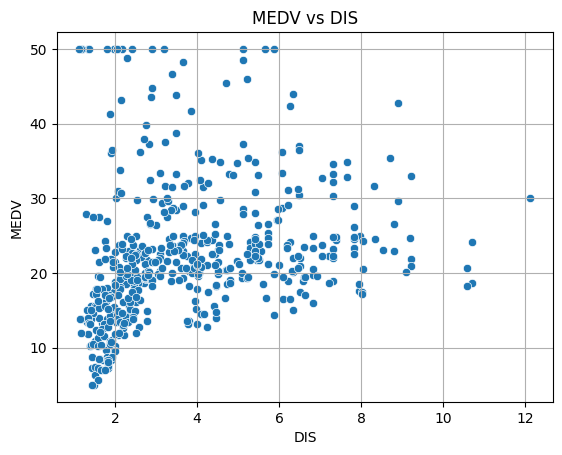

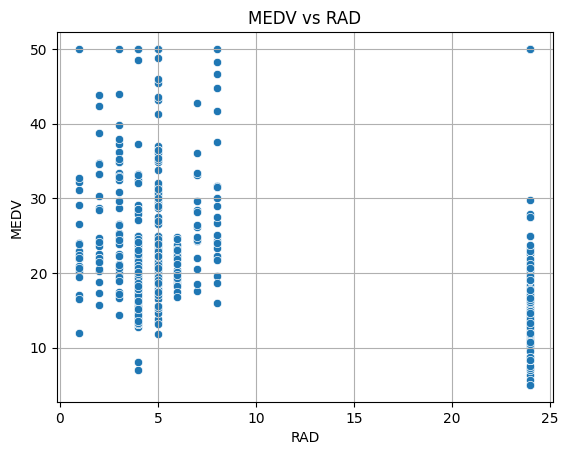

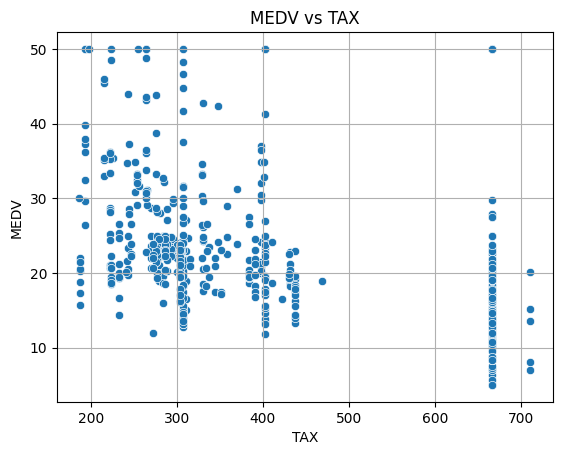

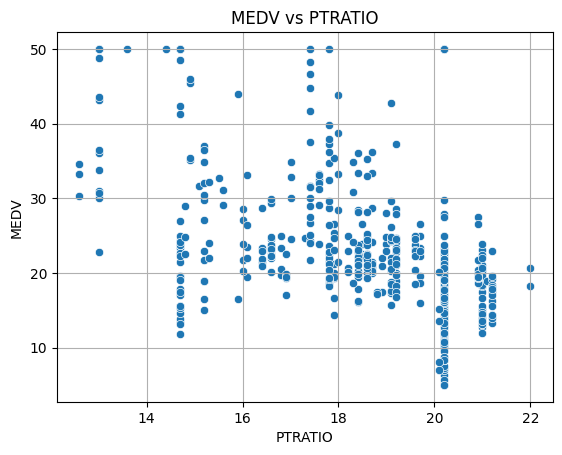

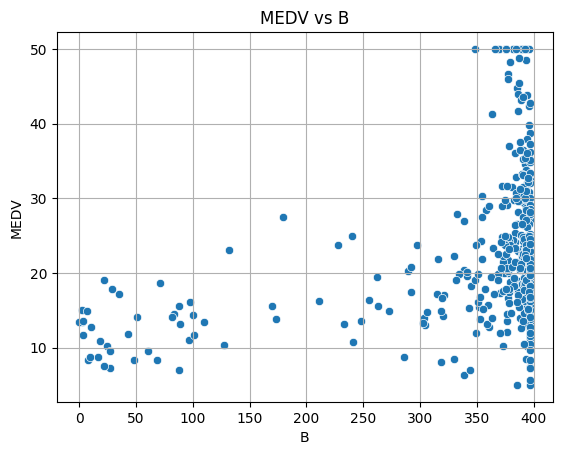

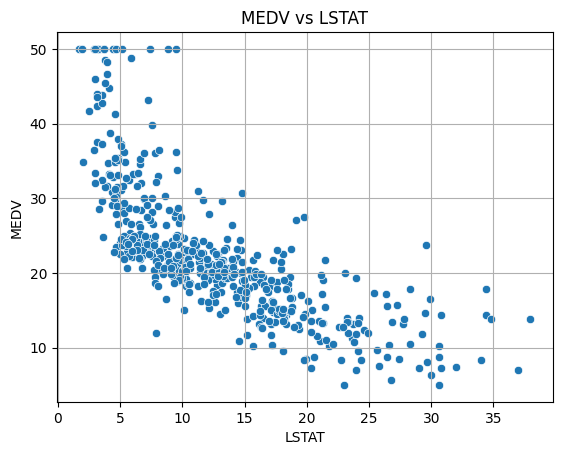

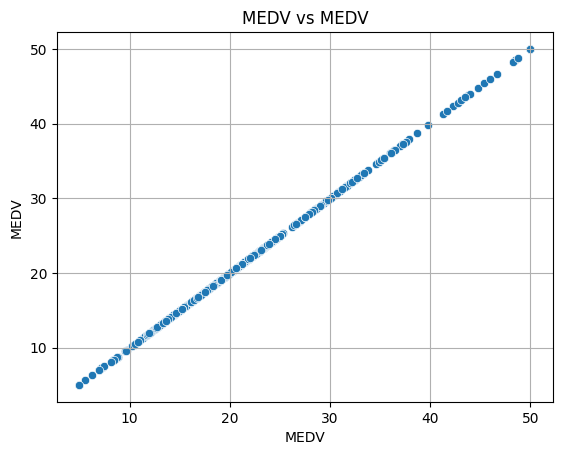

In [258]:
for i in df.columns:
    plt.figure()
    sns.scatterplot(x=df[i], y=df['MEDV'])
    plt.title(f'MEDV vs {i}')
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.grid()
    plt.show()

In [ ]:
# Normalización de los datos
scaler = StandardScaler()

df_scaled=scaler.fit_transform(df.drop(columns='MEDV'))
df_scaled=pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['MEDV']=df['MEDV'].values
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


In [ ]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_scaled[df_scaled.columns[0:13]], df["MEDV"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Resultados del modelo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_
})

print("Intercepto (θ₀):", model.intercept_)
print(coeficientes)

y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Intercepto (θ₀): 22.485268239316902
   Variable  Coeficiente
0      CRIM    -0.971494
1        ZN     0.701556
2     INDUS     0.276752
3      CHAS     0.706532
4       NOX    -1.991430
5        RM     3.115718
6       AGE    -0.177060
7       DIS    -3.045771
8       RAD     2.282785
9       TAX    -1.792605
10  PTRATIO    -1.979954
11        B     1.126499
12    LSTAT    -3.628149
Error absoluto medio (MAE): 3.19
Coeficiente de determinación (R²): 0.67


In [261]:
print("Entrenamiento:")
print(r2_score(y_train, model.predict(X_train)))
print("Prueba:")
print(r2_score(y_test, model.predict(X_test)))


Entrenamiento:
0.7508856358979673
Prueba:
0.668759493535632


### Regresión con las variables que están más correlacionados con la variable objetivo (MEDV). 

LSTAT: Porcentaje de población con bajo estatus socioeconómico

PTRATIO: Relación alumnos-profesor por ciudad

RM: Número promedio de habitaciones por vivienda

TAX: Impuestos

In [ ]:
# Variables que están más correlacionadas con MEDV
x1=df_scaled['LSTAT']
x2=df_scaled['RM']
x3=df_scaled['PTRATIO']
x4=df_scaled['TAX']
y=df['MEDV']

data=pd.DataFrame({"LSTAT":x1, "RM":x2, "PTRATIO":x3, "TAX":x4, "MEDV":y})
data

,LSTAT,RM,PTRATIO,TAX,MEDV
0,-1.075562,0.413672,-1.459000,-0.666608,24.0
1,-0.492439,0.194274,-0.303094,-0.987329,21.6
2,-1.208727,1.282714,-0.303094,-0.987329,34.7
3,-1.361517,1.016303,0.113032,-1.106115,33.4
4,-1.026501,1.228577,0.113032,-1.106115,36.2
...,...,...,...,...,...
501,-0.418147,0.439316,1.176466,-0.803212,22.4
502,-0.500850,-0.234548,1.176466,-0.803212,20.6
503,-0.983048,0.984960,1.176466,-0.803212,23.9
504,-0.865302,0.725672,1.176466,-0.803212,22.0


In [ ]:
# Mismo procedimiento anterior pero con las variables seleccionadas
X_train1, X_test1, y_train1, y_test1 = train_test_split(data[["LSTAT", "RM", "PTRATIO", "TAX"]], data["MEDV"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train1, y_train1)

coeficientes = pd.DataFrame({
    'Variable': X_train1.columns,
    'Coeficiente': model.coef_
})

print("Intercepto (θ₀):", model.intercept_)
print(coeficientes)

y_pred1 = model.predict(X_test1)

mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Intercepto (θ₀): 22.413217094276845
  Variable  Coeficiente
0    LSTAT    -3.802933
1       RM     3.525457
2  PTRATIO    -1.729482
3      TAX    -0.491504
Error absoluto medio (MAE): 3.29
Coeficiente de determinación (R²): 0.63


In [264]:
print("Entrenamiento:")
print(r2_score(y_train1, model.predict(X_train1)))
print("Prueba:")
print(r2_score(y_test1, model.predict(X_test1)))

Entrenamiento:
0.6881698566624727
Prueba:
0.6276519117091853


Al analizar el modelo de regresión multivariada se encontró que, al usar todas las características disponibles, el desempeño fue mejor que al emplear solo una parte de ellas. En este caso, el error absoluto medio (MAE) fue menor y el coeficiente de determinación (R²) aumentó, lo que indica que las predicciones se ajustan con mayor precisión a los valores reales del conjunto de prueba. Esto muestra que el precio medio de las viviendas (MEDV) está influenciado por varios factores al mismo tiempo, y que eliminar algunas variables reduce la capacidad del modelo para representar correctamente esas relaciones

### Usando la ecuación normal

In [265]:
m=len(X_train) # Número de datos de entrenamiento 

n=len(df_scaled.columns)-1 # Número de características

X=np.zeros((n+1,m))

for i in range(1, n+1):
    X[0,:]=1
    X[i,:]=X_train[X_train.columns[i-1]]


print(np.shape(X))

Y = y_train.values.reshape(1, -1)

(14, 404)


In [266]:
cols = ['Intercepto'] + list(df.columns[1:])
vals = (theta(X, Y)).flatten()

for c, v in zip(cols, vals):
    print(f"{c}: {v:.4f}")

Intercepto: 22.4853
ZN: -0.9715
INDUS: 0.7016
CHAS: 0.2768
NOX: 0.7065
RM: -1.9914
AGE: 3.1157
DIS: -0.1771
RAD: -3.0458
TAX: 2.2828
PTRATIO: -1.7926
B: -1.9800
LSTAT: 1.1265
MEDV: -3.6281


Al comparar los resultados de la implementación con la ecuación normal con los de scikit-learn, se ve que los coeficientes y el intercepto son casi iguales. 